Una vez descomprimidos los videos en frames, pasamos a leerlos y añadirlos a una lista, de manera que podamos pasarsela después al modelo en el formato que más nos convenga.

In [10]:
import os
import cv2

from sklearn.externals import joblib

In [15]:
X_train = []
y_train = []
X_test = []
y_test = []

count=0
yourpath = '../imagenes-vacia/'
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        if count%100==0:
            print(name[:-4],end=", ")
        
        if count%50==0:
            imagen = cv2.imread(yourpath+name)
            X_test.append(imagen)
            y_test.append('vacia')
        elif count%5==0:
            imagen = cv2.imread(yourpath+name)
            X_train.append(imagen)
            y_train.append('vacia')
        count += 1

yourpath = '../imagenes-congestionada/'
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        if count%100==0:
            print(name[:-4],end=", ")
        if count%50==0:
            imagen = cv2.imread(yourpath+name)
            X_test.append(imagen)
            y_test.append('congestionada')
        elif count%5==0:
            imagen = cv2.imread(yourpath+name)
            X_train.append(imagen)
            y_train.append('congestionada')
        count += 1

yourpath = '../imagenes-atascada/'
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        if count%100==0:
            print("a"+name[1:-4],end=", ")
        if count%50==0:
            imagen = cv2.imread(yourpath+name)
            X_test.append(imagen)
            y_test.append('atascada')
        elif count%5==0:
            imagen = cv2.imread(yourpath+name)
            X_train.append(imagen)
            y_train.append('atascada')
        count += 1

frameRed0, frameRed1088, frameRed1178, frameRed1268, frameRed1358, frameRed1448, frameRed1538, frameRed1628, frameRed1718, frameRed1808, frameRed1899, frameRed1989, frameRed2078, frameRed2168, frameRed2258, frameRed2348, frameRed2438, frameRed2528, frameRed2618, frameRed2708, frameRed2799, frameRed2889, frameRed2979, frameRed3068, frameRed3158, frameRed3248, frameRed3338, frameRed3428, frameRed3518, frameRed3608, frameRed3699, frameRed3789, frameRed3879, frameRed3969, frameRed4058, frameRed4148, frameRed4238, frameRed4328, frameRed4418, frameRed4508, frameRed4599, frameRed4689, frameRed4779, frameRed4869, frameRed4959, frameRed5048, frameRed5138, frameRed5228, frameRed5318, frameRed5408, frameRed5499, frameRed5589, frameRed5679, frameRed5769, frameRed5859, frameRed5949, frameRed6038, frameRed651, frameRed741, frameRed831, frameRed921, cRed_frame0113, cRed_frame0213, cRed_frame0313, cRed_frame0413, cRed_frame0513, cRed_frame0613, cRed_frame0713, cRed_frame0813, cRed_frame0913, cRed_fram

Dada la ingente cantidad de datos que hemos leido, si vamos a tener que leer varias veces este conjunto de datos nos combiene guardarlo en una estructura más eficiente a la hora de que nuestro programa de Python lo lea. Esto lo haremos por medio de la herramienta de Sklearn <u><font color=red><b>joblib</b></font></u>

In [16]:
filename='D:\modelos\RX_train.sav'
joblib.dump(X_train,filename)
filename='D:\modelos\RX_test.sav'
joblib.dump(X_test,filename)
filename='D:\modelos\Ry_train.sav'
joblib.dump(y_train,filename)
filename='D:\modelos\Ry_test.sav'
joblib.dump(y_test,filename)

['D:\\modelos\\Ry_test.sav']

Llegados a este punto, podremos buscar las listas guardadas con extensión .sav. Son considerablemente más grandes que las imagenes originales, pero ayudará a la hora de leer los datos de nuevo, en caso de que se quieran leer. Esta opcion está más recomendada para persistir los modelos entrenados y reentrenarlos partiendo de un paso más avanzado cada vez.

Ahora, si quisiesemos ver un ejemplo de las imagenes que he guardado en esos archivos, llamaremos a la funcion imshow de matplotlib.pyplot

Longitud del conjunto de fotos de train:  3835
Longitud del conjunto de fotos de test:    427
Tamaño de cada imagen: 			    506 x 900


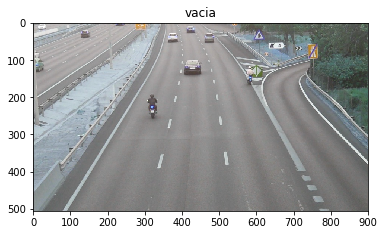

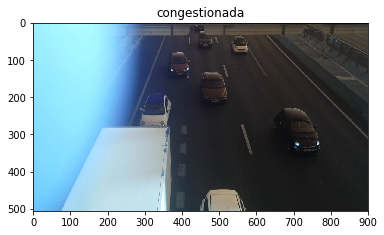

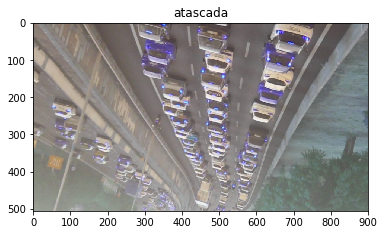

In [17]:
import matplotlib.pyplot as ply
print('Longitud del conjunto de fotos de train: ',len(X_train))
print('Longitud del conjunto de fotos de test:   ',len(X_test))
print('Tamaño de cada imagen: \t\t\t   ',X_train[0].shape[0],'x',X_train[0].shape[1])

ply.imshow(X_train[10])
ply.title(y_train[10])
ply.show()
ply.imshow(X_train[1611])
ply.title(y_train[1611])
ply.show()
ply.imshow(X_train[2800])
ply.title(y_train[2800])
ply.show()

En las imagenes que se muestran aparece una acción que se llevó a cabo con la camara con la que se grabaron estas imágenes. Como vemos en la carretera que hemos designado como "atascada", la camara se rotó. De esta manera, podríamos simular que las posibles cámaras en las que se usara este modelo podrían estar sometidas a fallos como que se descuelgue parcialmente del soporte destinado a estabilizarla.

Asi mismo, por ese motivo aparece una figura extraña a la izquierda de la imagen designada como "congestionada", que el modelo debería obviar, asi como debería obviar posibles ramas de árboles.

## Explicación de la naturaleza de  los datos

Para aquellos que ya hayan realizado algún ejercicio de estos seguramente esta explicación que voy a poner a continuación os sobre o incluso me la podréis criticar. Voy a tratar de explicar cómo lee las imagenes el sistema

Si queremos imprimir una imagen, tal y como hemos hecho anteriormente tan solo hay que llamar a la funcion imshow de matplotlib.pyplot

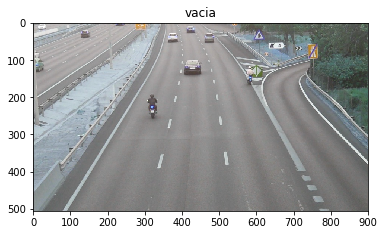

In [18]:
ply.imshow(X_train[10])
ply.title(y_train[10])
ply.show()

Pero... ¿qué sucede cuando leemos esa imagen? ¿Por qué le hemos tenido que decir que nos la muestre con "imshow()" en lugar de con el clásico "print()" de toda la vida? Veamos qué sucede si imprimimos la foto.

In [19]:
print(y_train[10])
print(X_train[10])

vacia
[[[174 180 179]
  [189 195 194]
  [195 200 199]
  ...
  [101 114  98]
  [ 96 109  95]
  [ 89 104  90]]

 [[182 188 187]
  [172 178 177]
  [166 171 170]
  ...
  [108 123 109]
  [ 97 114 100]
  [ 86 105  90]]

 [[168 174 173]
  [163 169 168]
  [168 173 172]
  ...
  [100 119 104]
  [ 89 110  95]
  [ 80 101  86]]

 ...

 [[142 151 155]
  [141 150 154]
  [141 150 154]
  ...
  [ 95  97  97]
  [ 95  97  97]
  [ 96  98  98]]

 [[141 149 156]
  [141 150 154]
  [141 150 154]
  ...
  [ 94  94  94]
  [ 98  98  98]
  [101 101 101]]

 [[141 149 156]
  [141 149 156]
  [142 151 155]
  ...
  [ 94  94  94]
  [ 98  98  98]
  [101 101 101]]]


Es una figura un tanto extraña la mostrada con la función print(). Veamos qué forma tiene

In [20]:
X_train[10].shape

(506, 900, 3)

Es una lista compuesta de 506 elementos en cada uno de los cuales hay otra lista de 900 elementos. Como he mostrado antes:

In [21]:
print('Tamaño de cada imagen: \t\t\t   ',X_train[0].shape[0],'x',X_train[0].shape[1])

Tamaño de cada imagen: 			    506 x 900


Esos valores son el tamaño de cada una de las imágenes. Si atendemos a eso, podemos decir que el tamaño 506,900 guarda una relación con los pixeles de la imagen. En este caso, X_train[10] será la lista de los 506 valores que entenderemos por filas de pixeles, siendo cada valor dentro de X_train[10][i] un pixel dentro de la fila. Veamos que ocurre cuando decimos que no nos imprima la lista con las 506 filas de pixeles sino que quiero las primeras 253 filas:

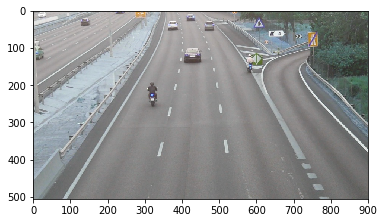

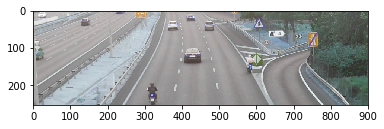

In [48]:
ply.imshow(X_train[10])
ply.show()
ply.imshow(X_train[10][:253])
ply.show()

Nos imprime la mitad superior de la imagen

¿Y si quisieramos acotarlo horizontalmente? Esto se trata simplemente de jugar con la estructura de la lista de listas.

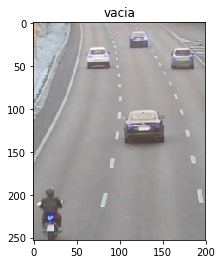

In [26]:
ply.imshow(X_train[10][:253][:,300:500])
ply.title(y_train[10])
ply.show()

Podemos hacer un zoom casero en la imagen, en donde se perdería calidad con tal de ver la imagen más grande.

Hasta aqui todo es sencillo. Sin embargo, la forma de la lista de entrenamiento era 506x900x3. Este 3, ¿A que hace alusión?

Trato de ver si puedo enseñaros esos 3 valores por medio de las imagenes

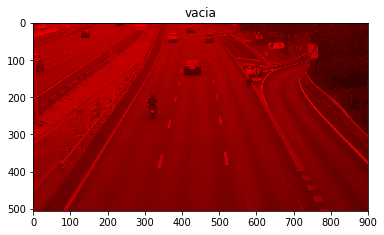

In [34]:
foto = X_train[10]
foto0 = [[[z0,0,0] for [z0,z1,z2] in y] for y in foto]
ply.imshow(foto0)
ply.title(y_train[10])
ply.show()

En este caso, creo que sobran las palabras. Sin embargo, para aclarar cualquier posible duda, volveré a repetir el proceso, esta vez quedandome con la segunda (y despues la tercera) componente.

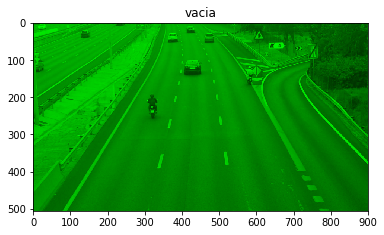

In [35]:
foto1 = [[[0,z1,0] for [z0,z1,z2] in y] for y in foto]
ply.imshow(foto1)
ply.title(y_train[10])
ply.show()

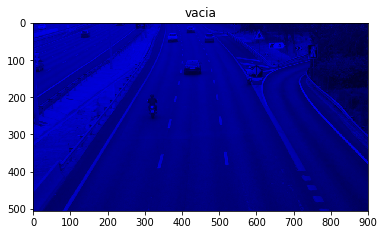

In [36]:
foto2 = [[[0,0,z2] for [z0,z1,z2] in y] for y in foto]
ply.imshow(foto2)
ply.title(y_train[10])
ply.show()

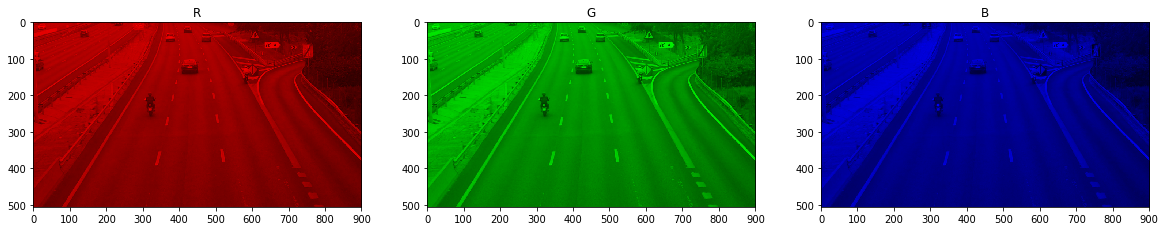

In [66]:
ply.figure(figsize=(20,20))
ply.subplot(131)
ply.imshow(foto0)
ply.title('R')
ply.subplot(132)
ply.imshow(foto1)
ply.title('G')
ply.subplot(133)
ply.imshow(foto2)
ply.title('B')
ply.show()


Recopilando, en la estructura que teniamos anteriormente de 506x900x3, esto era Filas de pixels x Columnas de pixels x información del espectro RGB

Veamos ahora como es cada una de las imagenes que acabo de imprimir, para el color R como el color G como el B:

In [41]:
lista_R = []
lista_G = []
lista_B = []

for x in foto:
    for y in x:
        lista_R.append(y[0])
        lista_G.append(y[1])
        lista_B.append(y[2])


In [64]:
print(lista_R[:200])

[174, 189, 195, 189, 191, 179, 168, 164, 173, 178, 171, 170, 178, 179, 172, 168, 175, 170, 167, 166, 182, 180, 163, 174, 191, 183, 170, 178, 173, 163, 163, 164, 161, 157, 157, 161, 164, 164, 166, 165, 166, 170, 171, 174, 179, 189, 194, 194, 190, 189, 188, 188, 190, 190, 190, 193, 192, 193, 193, 193, 192, 191, 193, 196, 198, 198, 197, 197, 197, 196, 193, 192, 193, 195, 195, 195, 195, 198, 198, 198, 197, 196, 196, 197, 200, 200, 198, 195, 190, 190, 189, 189, 189, 190, 190, 190, 195, 197, 198, 196, 196, 196, 197, 197, 198, 196, 195, 193, 193, 193, 191, 192, 195, 194, 194, 194, 191, 190, 192, 195, 203, 210, 218, 216, 218, 224, 220, 202, 191, 180, 166, 165, 176, 184, 185, 188, 200, 218, 219, 216, 209, 206, 201, 184, 172, 163, 164, 166, 171, 182, 187, 181, 182, 185, 187, 187, 189, 193, 193, 189, 190, 194, 193, 193, 193, 194, 195, 191, 195, 199, 201, 191, 174, 168, 172, 175, 173, 156, 151, 158, 160, 159, 160, 161, 162, 162, 163, 164, 172, 182, 194, 201, 196, 194, 190, 189, 193, 195, 191, 185]

La lista del <font color=red>rojo</font> (asi como la del <font color=green>verde</font> y la del <font color=blue>azul</font>) será una lista de longitud 506x900 (una longitud de 455.400 valores)

In [43]:
print("Valor maximo: ",np.max(lista_R))
print("Valor minimo: ",np.min(lista_R))

Valor maximo:  255
Valor minimo:  31


Para cada pixel en la foto, para cada color en el espectro RGB, toma su tonalidad. Esta tonalidad se suele representar en valores que van entre el 0 (no existe ese color) y el 255 (está muy saturado de ese color). No obstante, esto es solo para uno de los tres colores del espector RGB. Por medio de su combinación, tenemos los colores que vemos en la imagen (que no está demasiado bien impresa en este cuaderno de Jupyter, no tiene esos colores en la realidad).

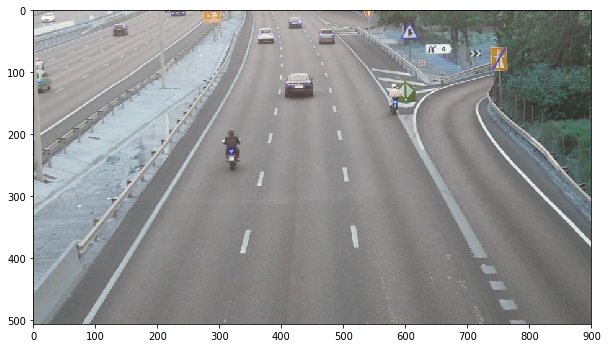

In [55]:
ply.figure(figsize=(10,10))
ply.imshow(foto)
ply.show()

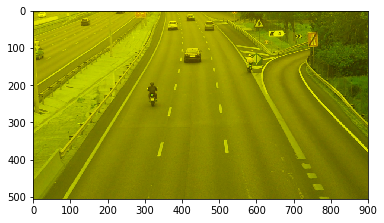

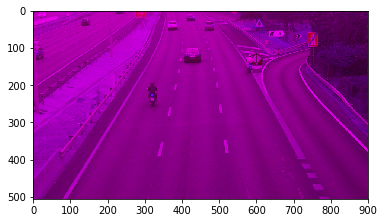

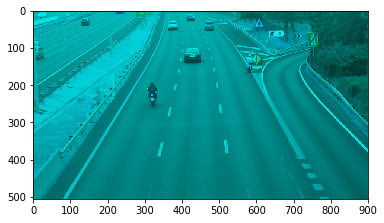

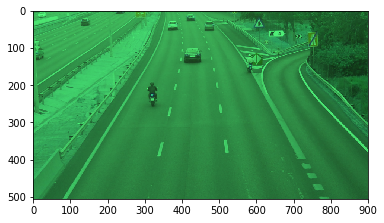

In [62]:
from math import floor
foto3 = [[[z0,z1,0] for [z0,z1,z2] in y] for y in foto]
ply.imshow(foto3)
ply.show()
foto4 = [[[z0,0,z2] for [z0,z1,z2] in y] for y in foto]
ply.imshow(foto4)
ply.show()
foto5 = [[[0,z1,z2] for [z0,z1,z2] in y] for y in foto]
ply.imshow(foto5)
ply.show()
foto6 = [[[floor(z0/3),z1,floor(z2/2)] for [z0,z1,z2] in y] for y in foto]
ply.imshow(foto6)
ply.show()